In [1]:
!pip install opendatasets
!pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import opendatasets as od
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance")

In [4]:
file_path = "/content/insurance/insurance.csv"
insurance_df = pd.read_csv(file_path)
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
sw_ph = len(insurance_df[insurance_df["region"]=="southwest"])
se_ph = len(insurance_df[insurance_df["region"]=="southeast"])
nw_ph = len(insurance_df[insurance_df["region"]=="northwest"])
ne_ph = len(insurance_df[insurance_df["region"]=="northeast"])

print(f"SW policyholder amount: {sw_ph}")
print(f"SE policyholder amount: {se_ph}")
print(f"NW policyholder amount: {nw_ph}")
print(f"NE policyholder amount: {ne_ph}")

SW policyholder amount: 325
SE policyholder amount: 364
NW policyholder amount: 325
NE policyholder amount: 324


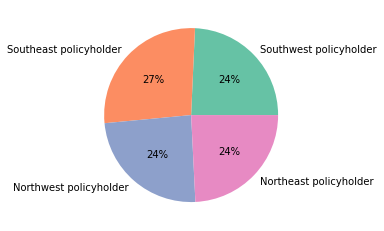

In [7]:
region_pie_label = ["Southwest policyholder","Southeast policyholder", "Northwest policyholder", "Northeast policyholder"]
region_pie_data = [sw_ph, se_ph, nw_ph, ne_ph]

plt.pie(region_pie_data, labels=region_pie_label, colors=sns.color_palette('Set2'), autopct='%.0f%%')
plt.show()

In [8]:
n_smoker = len(insurance_df[insurance_df["smoker"]=="yes"])
n_non_smoker = len(insurance_df[insurance_df["smoker"]=="no"])

print(f"smoker policyholder amount: {n_smoker}")
print(f"nonsmoker policyholder amount: {n_non_smoker}")

smoker policyholder amount: 274
nonsmoker policyholder amount: 1064


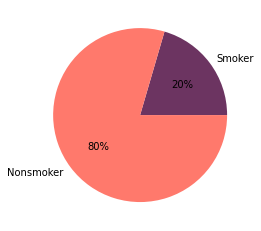

In [9]:
smoker_color = ['#6c3461', # Smoker
                '#ff796c', # Non-smoker
               ]
smoker_pie_label = ["Smoker", "Nonsmoker"]
smoker_pie_data = [n_smoker, n_non_smoker]

plt.pie(smoker_pie_data, labels=smoker_pie_label, colors=sns.color_palette(smoker_color), autopct='%.0f%%')
plt.show()

In [10]:
n_male = len(insurance_df[insurance_df["sex"]=="male"])
n_female = len(insurance_df[insurance_df["sex"]=="female"])

print(f"male policyholder amount: {n_male}")
print(f"female policyholder amount: {n_female}")

male policyholder amount: 676
female policyholder amount: 662


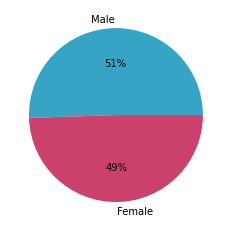

In [11]:
gender_color = ['#36a4c4', #Male
                '#cb416b', #Female
               ]
gender_pie_label = ["Male", "Female"]
gender_pie_data = [n_male, n_female]

plt.pie(gender_pie_data, labels=gender_pie_label, colors=sns.color_palette(gender_color), autopct='%.0f%%')
plt.show()

In [12]:
cov_insurance_data = insurance_df.cov()
corr_insurance_data = insurance_df.corr()

print('covariance between quantitative variables')
print(cov_insurance_data,'\n')
print('correlation coefficient between quantitative variables')
print(corr_insurance_data)

covariance between quantitative variables
                   age           bmi    children       charges
age         197.401387      9.362337    0.719303  5.087480e+04
bmi           9.362337     37.187884    0.093795  1.464730e+04
children      0.719303      0.093795    1.453213  9.926742e+02
charges   50874.802298  14647.304426  992.674197  1.466524e+08 

correlation coefficient between quantitative variables
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [13]:
from sklearn.preprocessing import LabelEncoder
#sex
le = LabelEncoder()
le.fit(insurance_df.sex.drop_duplicates()) 
insurance_df.sex = le.transform(insurance_df.sex)
# smoker or not
le.fit(insurance_df.smoker.drop_duplicates()) 
insurance_df.smoker = le.transform(insurance_df.smoker)
#region
le.fit(insurance_df.region.drop_duplicates()) 
insurance_df.region = le.transform(insurance_df.region)

In [14]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [15]:
insurance_df.corr()['charges'].sort_values()

region     -0.006208
sex         0.057292
children    0.067998
bmi         0.198341
age         0.299008
smoker      0.787251
charges     1.000000
Name: charges, dtype: float64

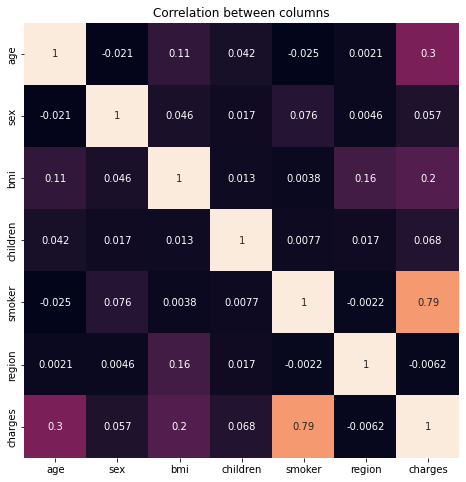

In [16]:
f, ax = plt.subplots(figsize=(10, 8))
corr = insurance_df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr), square=True, ax=ax, annot=True, cbar=False)
plt.title("Correlation between columns")
plt.show()

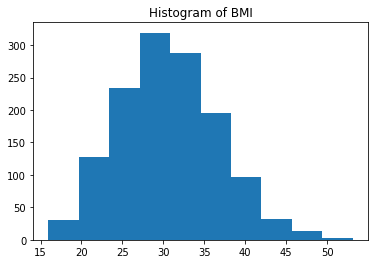

In [17]:
plt.hist(insurance_df["bmi"])
plt.title("Histogram of BMI")
plt.show()

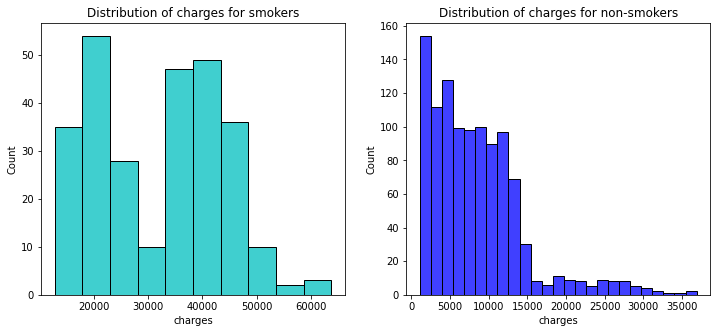

In [18]:
f= plt.figure(figsize=(12,5))

ax=f.add_subplot(121)
sns.histplot(insurance_df[(insurance_df.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(insurance_df[(insurance_df.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')
plt.show()

We can clearly see that non-smokers pays less than smokers. Also, most of the smokers are in the upper 50th percentile.

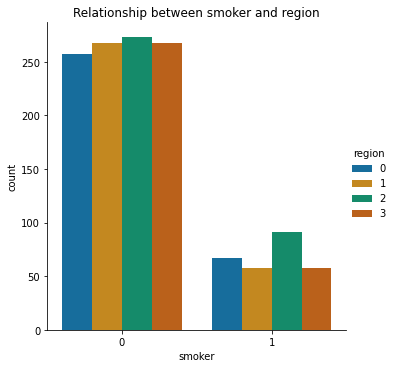

In [19]:
sns.catplot(x="smoker", kind="count",hue = 'region', palette="colorblind", data=insurance_df)
plt.title("Relationship between smoker and region")
plt.show()

We can see that most of the smoker in the region 2.

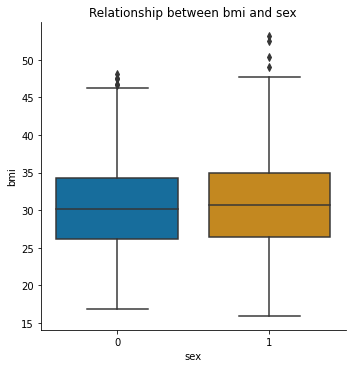

In [20]:
sns.catplot(x = 'sex', y="bmi", kind="box", palette="colorblind", data=insurance_df)
plt.title("Relationship between bmi and sex")
plt.show()

Male(1) and female(0) have almost same boxplot but some of the males bigger than 50 bmi. We can say that we have some outliers here.

In [21]:
children_df = insurance_df.groupby("region")
children_df["children"].sum()

region
0    339
1    373
2    382
3    371
Name: children, dtype: int64

We can see that most of the children in the region 2.

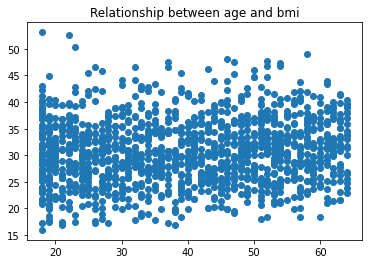

In [22]:
plt.scatter(insurance_df["age"], insurance_df["bmi"])
plt.title("Relationship between age and bmi")
plt.show()

We can see that it distribute almost evenly. In some ages, they have some outliers but they can be negligible.

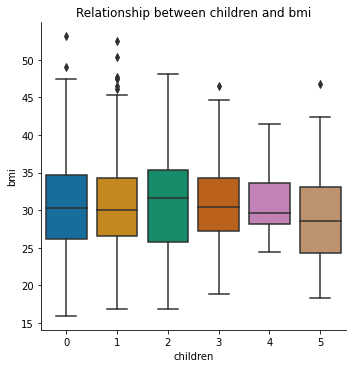

In [23]:
sns.catplot(x = 'children', y="bmi", kind="box", palette="colorblind", data=insurance_df)
plt.title("Relationship between children and bmi")
plt.show()

All of them has almost same boxplot but some of them have some upper outliers and small range than others.

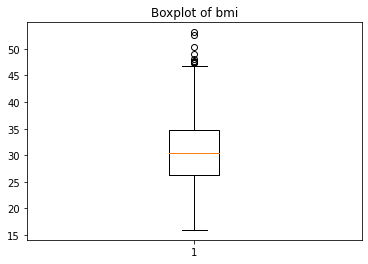

In [24]:
plt.boxplot(insurance_df["bmi"])
plt.title("Boxplot of bmi")
plt.show()

We can see that bmi has some upper outliers.

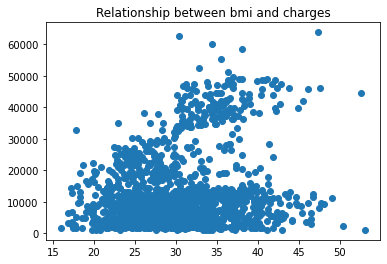

In [25]:
plt.scatter(insurance_df["bmi"], insurance_df["charges"])
plt.title("Relationship between bmi and charges")
plt.show()

We can see that charges mostly distributes between 0 and 20,000. Also, it looks like has 3 clusters if we use K-means clustering.

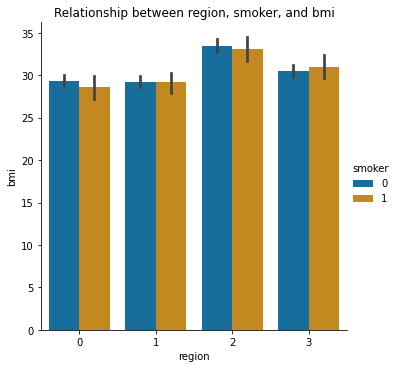

In [26]:
sns.catplot(x = 'region', y="bmi", kind="bar", hue="smoker", palette="colorblind", data=insurance_df)
plt.title("Relationship between region, smoker, and bmi")
plt.show()

Almost all regions has same bmi, and smoker, and non-smoker but region 2 significantly higher than others in both smoker, and non-smoker groups.

In [27]:
x = insurance_df.drop(['charges'], axis = 1)
x = np.array(x)
y = insurance_df.charges
y = np.array(y)


In [28]:
x[:5]

array([[19.   ,  0.   , 27.9  ,  0.   ,  1.   ,  3.   ],
       [18.   ,  1.   , 33.77 ,  1.   ,  0.   ,  2.   ],
       [28.   ,  1.   , 33.   ,  3.   ,  0.   ,  2.   ],
       [33.   ,  1.   , 22.705,  0.   ,  0.   ,  1.   ],
       [32.   ,  1.   , 28.88 ,  0.   ,  0.   ,  1.   ]])

In [29]:
y[:5]

array([16884.924  ,  1725.5523 ,  4449.462  , 21984.47061,  3866.8552 ])

In [30]:
x.shape, y.shape

((1338, 6), (1338,))

In [31]:
from sklearn.preprocessing import MinMaxScaler

# X Min Max Scaling
scaler = MinMaxScaler()
model = scaler.fit(x)
x = model.transform(x)

# Y Min Max Scaling
y = np.array(y)
y = y.reshape(-1,1)
scaler1 = MinMaxScaler()
model1 = scaler1.fit(y)
y = model1.transform(y)

print("X\n",x, "\n\ny\n", y)

X
 [[0.02173913 0.         0.3212268  0.         1.         1.        ]
 [0.         1.         0.47914985 0.2        0.         0.66666667]
 [0.2173913  1.         0.45843422 0.6        0.         0.66666667]
 ...
 [0.         0.         0.56201238 0.         0.         0.66666667]
 [0.06521739 0.         0.26472962 0.         0.         1.        ]
 [0.93478261 0.         0.35270379 0.         1.         0.33333333]] 

y
 [[0.25161076]
 [0.00963595]
 [0.05311516]
 ...
 [0.00810808]
 [0.01414352]
 [0.44724873]]


In [32]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=True, random_state=44)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((1003, 6), (1003, 1), (335, 6), (335, 1))

In [33]:
# X_train = X_train.T
# X_test = X_test.T
# y_train = y_train.T
# y_test = y_test.T

In [34]:
print("Examples from X_train and y_test\n", x_train[:5], "\n" * 2, y_test[:5])

Examples from X_train and y_test
 [[0.91304348 1.         0.45305354 0.         1.         1.        ]
 [0.63043478 1.         0.54452515 0.2        0.         1.        ]
 [0.         1.         0.46731235 0.         0.         0.66666667]
 [0.02173913 0.         0.51627657 0.         0.         0.33333333]
 [0.69565217 1.         0.43960183 0.4        0.         1.        ]] 

 [[0.0577251 ]
 [0.0148998 ]
 [0.10094477]
 [0.29114997]
 [0.02606839]]


In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

In [36]:
# with a learning curve (applying cross-validation)
def evaluate_models(algorithm, X, y):
    
    # Learning curve
    N, train_score, val_score = learning_curve(
        algorithm, X, y,
        cv=5, scoring='r2',
        train_sizes=np.linspace(0.1, 1, 10)
    )
    
    # Plot the learning curve
    plt.figure(figsize=(8, 3))
    plt.plot(N, train_score.mean(axis=1), label='train_score')
    plt.plot(N, val_score.mean(axis=1), label='val_score')
    plt.legend()
    plt.title(f'{algorithm}', fontsize=18)
    
    train_scores.append(train_score[-1].mean())
    val_scores.append(val_score[-1].mean())
    
    # Print the results
    print(f'{algorithm}')
    print("train_score =", "%0.3f" % train_score[-1].mean())
    print("val_score =", "%0.3f" % val_score[-1].mean())
    plt.show()
    print("-"*20)

In [37]:
algorithms = [GradientBoostingRegressor(),
              LinearRegression(),
              RandomForestRegressor(),
              AdaBoostRegressor()]

GradientBoostingRegressor()
train_score = 0.904
val_score = 0.855


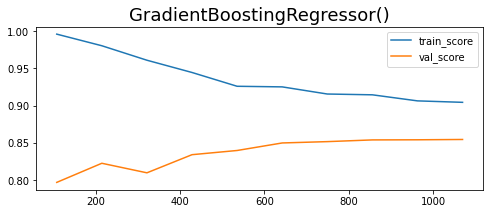

--------------------
LinearRegression()
train_score = 0.751
val_score = 0.747


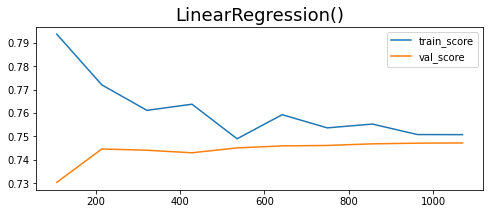

--------------------
RandomForestRegressor()
train_score = 0.977
val_score = 0.834


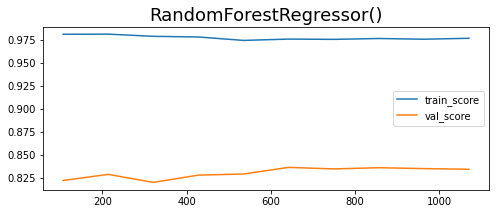

--------------------
AdaBoostRegressor()
train_score = 0.836
val_score = 0.820


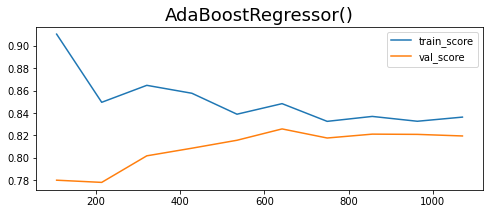

--------------------


In [38]:
train_scores = []
val_scores = []

for a in algorithms:
    evaluate_models(a, x, y)

In [39]:
lr = LinearRegression().fit(x_train,y_train)

y_train_pred_lr = lr.predict(x_train)
y_test_pred_lr = lr.predict(x_test)

print("Score", lr.score(x_test,y_test))
print('Train R2score', r2_score(y_train,y_train_pred_lr))
print('Test R2score', r2_score(y_test,y_test_pred_lr))
print('Train MAE', mean_absolute_error(y_train,y_train_pred_lr))
print('Test MAE', mean_absolute_error(y_test,y_test_pred_lr))
print('Train MSE', mean_squared_error(y_train,y_train_pred_lr))
print('Test MSE', mean_squared_error(y_test,y_test_pred_lr))
print('Train RMSE', np.sqrt(mean_squared_error(y_train,y_train_pred_lr)))
print('Test RMSE', np.sqrt(mean_squared_error(y_test,y_test_pred_lr)))

Score 0.7467311941745087
Train R2score 0.7511290206196497
Test R2score 0.7467311941745087
Train MAE 0.06787063340328893
Test MAE 0.06335548350841984
Train MSE 0.009749376531950658
Test MSE 0.008037525229198277
Train RMSE 0.09873893118699766
Test RMSE 0.08965224609120664


In [40]:
score=cross_val_score(lr,x,y,cv=5,scoring='r2')
avg_score=np.mean(score)
std_score=np.std(score)
coe_var=std_score/avg_score
print('R2 Score:',score)
print('Average Score:',avg_score,'\nStandard Score:',std_score, '\nCoveraiance:',coe_var)

R2 Score: [0.76123983 0.70838663 0.77786772 0.73365206 0.7551335 ]
Average Score: 0.7472559473580954 
Standard Score: 0.024044021908464896 
Coveraiance: 0.03217642093511859


In [41]:
score=cross_val_score(lr,x,y,cv=5,scoring='neg_mean_squared_error')
avg_score=np.mean(score)
std_score=np.std(score)
coe_var=std_score/avg_score
print('R2 Score:',score)
print('Average Score:',avg_score,'\nStandard Score:',std_score, '\nCoveraiance:',coe_var)

R2 Score: [-0.00945331 -0.00965032 -0.00830646 -0.01007408 -0.00947619]
Average Score: -0.009392072988437855 
Standard Score: 0.0005867192407690921 
Coveraiance: -0.0624696210827338


In [42]:
forest = RandomForestRegressor(n_estimators = 100, criterion = 'mse', random_state = 1, n_jobs = -1)
forest.fit(x_train,y_train)
forest_train_pred = forest.predict(x_train)
forest_test_pred = forest.predict(x_test)

print('MSE train data: %.3f, MSE test data: %.3f' % (mean_squared_error(y_train,forest_train_pred), mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (r2_score(y_train,forest_train_pred), r2_score(y_test,forest_test_pred)))

MSE train data: 0.001, MSE test data: 0.005
R2 train data: 0.976, R2 test data: 0.846


In [43]:
score=cross_val_score(forest,x,y,cv=5,scoring='r2')
avg_score=np.mean(score)
std_score=np.std(score)
coe_var=std_score/avg_score
print('R2 Score:',score)
print('Average Score:',avg_score,'\nStandard Score:',std_score, '\nCoveraiance:',coe_var)

R2 Score: [0.85359929 0.7725199  0.87220243 0.82846641 0.84993221]
Average Score: 0.8353440466393105 
Standard Score: 0.0343475865841102 
Coveraiance: 0.041117892349020344


In [44]:
score=cross_val_score(forest,x,y,cv=5,scoring='neg_mean_squared_error')
avg_score=np.mean(score)
std_score=np.std(score)
coe_var=std_score/avg_score
print('R2 Score:',score)
print('Average Score:',avg_score,'\nStandard Score:',std_score, '\nCoveraiance:',coe_var)

R2 Score: [-0.00579649 -0.00752797 -0.00477889 -0.00648792 -0.00580753]
Average Score: -0.006079760341301427 
Standard Score: 0.0009066977268543777 
Coveraiance: -0.14913379408970107


In [45]:
GBR = GradientBoostingRegressor()
GBR.fit(x_train, y_train)
GBR.score(x_test, y_test)

y_train_pred_gbr = GBR.predict(x_train)
y_test_pred_gbr = GBR.predict(x_test)

print('Train R2score', r2_score(y_train,y_train_pred_gbr))
print('Test R2score', r2_score(y_test,y_test_pred_gbr))
print('Train MAE', mean_absolute_error(y_train,y_train_pred_gbr))
print('Test MAE', mean_absolute_error(y_test,y_test_pred_gbr))
print('Train MSE', mean_squared_error(y_train,y_train_pred_gbr))
print('Test MSE', mean_squared_error(y_test,y_test_pred_gbr))
print('Train RMSE', np.sqrt(mean_squared_error(y_train,y_train_pred_gbr)))
print('Test RMSE', np.sqrt(mean_squared_error(y_test,y_test_pred_gbr)))

Train R2score 0.907361786234906
Test R2score 0.858666963470124
Train MAE 0.03316234126557267
Test MAE 0.03861380090472185
Train MSE 0.0036290483908247334
Test MSE 0.004485226055082328
Train RMSE 0.06024158356836856
Test RMSE 0.06697183031008133


In [46]:
score=cross_val_score(GBR,x,y,cv=5,scoring='r2')
avg_score=np.mean(score)
std_score=np.std(score)
coe_var=std_score/avg_score
print('R2 Score:',score)
print('Average Score:',avg_score,'\nStandard Score:',std_score, '\nCoveraiance:',coe_var)

R2 Score: [0.87516126 0.79143454 0.89402038 0.84897437 0.85970492]
Average Score: 0.8538590951108344 
Standard Score: 0.03470323025368263 
Coveraiance: 0.04064280681952332


In [47]:
score=cross_val_score(GBR,x,y,cv=5,scoring='neg_mean_squared_error')
avg_score=np.mean(score)
std_score=np.std(score)
coe_var=std_score/avg_score
print('R2 Score:',score)
print('Average Score:',avg_score,'\nStandard Score:',std_score, '\nCoveraiance:',coe_var)

R2 Score: [-0.00494207 -0.00690203 -0.00395757 -0.00571213 -0.00542634]
Average Score: -0.005388027012769821 
Standard Score: 0.0009637227070409366 
Coveraiance: -0.1788637482248843


In [49]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04], 'subsample': [0.9, 0.5, 0.2, 0.1], 'n_estimators': [100,500,1000, 1500], 'max_depth': [4,6,8,10]}

grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(x_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.03, max_depth=4, subsample=0.5)

 The best score across ALL searched params:
 0.8400114316694844

 The best parameters across ALL searched params:
 {'learning_rate': 0.03, 'max_depth': 4, 'n_estimators': 100, 'subsample': 0.5}
